In [156]:
import requests
import pandas
import networkx
from matplotlib import pyplot as plt

from tqdm import tqdm

In [157]:
token_address_list = [
    '0x69624640542aaa9d27ba8c80dc8e628f287f5a59', # @TORNADO
    '0x9d974ffd398db7af6be5c7b8ccb40126236853af', # @HERCO
    '0x93966a31f476e3f5ad14effd65121eec40e42345', # @ANI
    '0x1cfa8856d60c312600c4c12ea15dd0818ab92bfb', # @FLERO
    '0xcb7615cb4322cddc518f670b4da042dbefc69500', # @HYDRA
    '0xe9aa911741c6aafde0521dd0440ac1bcb30cada7', # @DEBCO
    '0xa4863c69110d48b59242786cfabbd20890b3b87b', # @LUX
    '0x3e61e305390bb45983879f318ee6d0d5d2805e65', # @DRACO
    '0x2682214a34d4cab473a86e6eb32fadecccc42443', # @RIA
    '0xb73d2591965e3f232e1ef1f5008d64d9553856de', # @TIG
    '0x39ed35f8a96b3d5e79d94e587d5a389e5c3823d6', # @Silthereum
    '0x0fe47eccc56ea2e8293ed68bd3c45eff9b7a9e4c', # @MILICO
    '0x55d562e6a4f1a97749599b2b8902c12d5e41e2e4', # @CQ ZuanShi
]
nft_address_list = [
    '0xc234e58cb077ccf4fbe57d3ac27db0d1cdfe0473', # @M4CHA
    '0x2808da3936a9c4305be1c4a4916c6eb392416160', # @FGITEM
    '0xee4213a294e12e2ebc7da2b4be60217d285c28b4', # @TOR
    '0xf8efcd3ee896ebbb479cab435dcaa650af5fb611', # @GAL
    '0xe5bfc7196160d6a182d0d6be5a9af9c8f75392f6', # @ROSship
    '0xeb98748add283845ac718857a7eb3b49d2b94a8e', # @WEART
    '0xef3ca314e7f1a71221fbf808fff77a62202334b7', # @WECOL
    '0x148924dbae1fb27b148189f77c2d9689d12c9c8a', # @CBZCMDR
]

In [158]:
columns = ['txhash', 'status', 'txtype', 'gasused', 'amount', 'basetype', 'txsize', 'from', 'to', 'feepayer', 'nonce', 'blocknumber', 'txindex', 'gasprice', 'time','id', 'type']

In [159]:
for k in range(0, 30, 1):
    df = pandas.DataFrame(columns = columns)

    for i in tqdm(range(0, 10000, 1), leave = True):
        response = requests.get(f'https://scopi.wemixnetwork.com/api/v1/chain/1003/tx?page={i + 1}&pagesize=20')
        response = response.json().get('data')

        for item in response:
            _hash = item.get('attributes').get('to')
            if not _hash in (token_address_list + nft_address_list):
                data = list()

                for key in item.keys():
                    try:
                        for key2 in item.get(key).keys():
                            data.append(item.get(key).get(key2))
                    except AttributeError:
                        data.append(item.get(key))

                df = pandas.concat([df, pandas.DataFrame(data = [data], columns = columns)])

    df.to_csv(f'data/tornado_tx_{k}.csv', sep = ',', index = False)

  8%|▊         | 795/10000 [03:47<43:55,  3.49it/s]  


KeyboardInterrupt: 

In [143]:
df.to_csv('data/toranado_tx_1.csv', sep = ',', index = False)

In [144]:
g1 = networkx.Graph()

In [145]:
node_list = df['from'].tolist() + df['to'].tolist()
node_list = set(node_list)
node_list = list(node_list)

In [146]:
g1.add_nodes_from(node_list)

In [147]:
edge_list = []

In [148]:
edge_df = df[['from', 'to']]

In [149]:
edge_df.apply(lambda x: edge_list.append((x['from'], x['to'])), axis = 1)

0    None
0    None
0    None
0    None
0    None
     ... 
0    None
0    None
0    None
0    None
0    None
Length: 148798, dtype: object

In [150]:
g1.add_edges_from(edge_list)

In [151]:
degree_list = []
max_value = 0
for node in node_list:
    var = g1.degree[node]
    degree_list.append(var)
    if var >= max_value:
        max_value = var

In [152]:
degree_list.sort(reverse = True)

In [153]:
degree_list

[24613,
 16627,
 2000,
 1219,
 478,
 424,
 312,
 245,
 163,
 153,
 12,
 10,
 9,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [71]:
node = [node for node, degree in dict(g1.degree()).items() if degree > 20000][0]

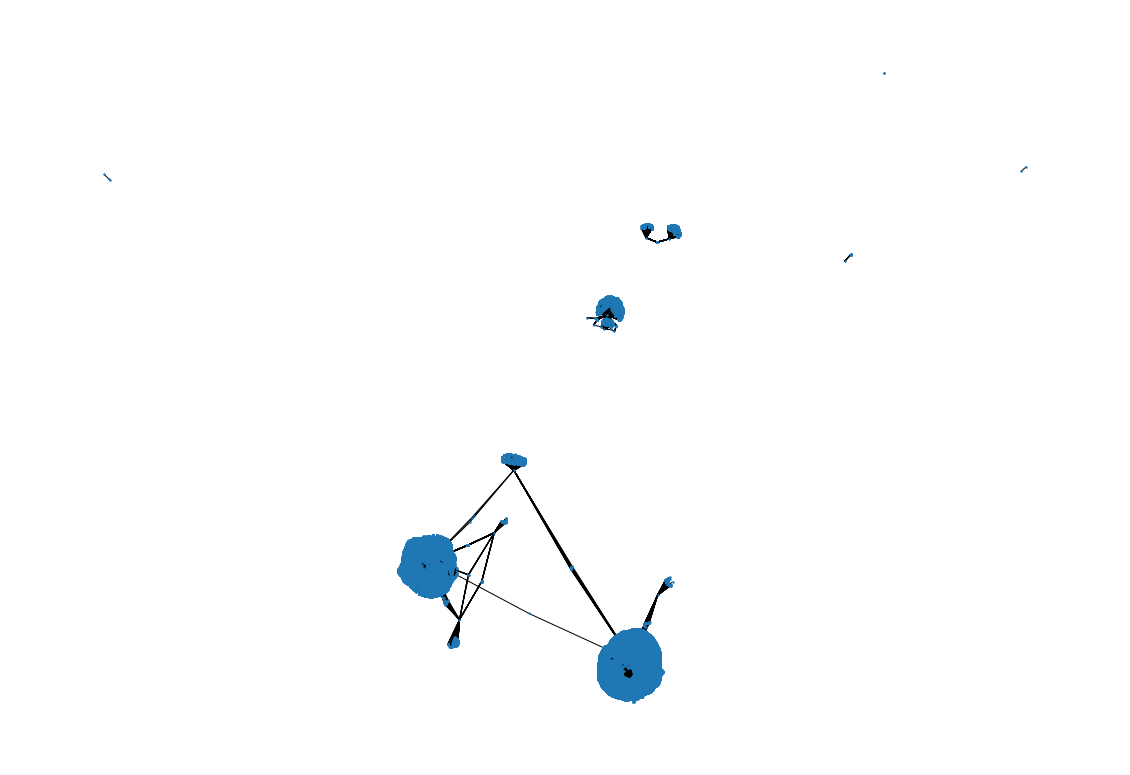

In [154]:
fig, ax = plt.subplots(figsize = (20, 14))

d = dict(g1.degree)
# nx.draw(g1, nodelist = d.keys(), node_size = [v * 1 for v in d.values()])
networkx.draw(g1, node_size = 2)

In [58]:
g1.degree

DegreeView({'0x567f373cb5239b9555f26f8aa7f0e9d899b33d3f': 1, '0x7f7217de51652f46a2afbc2821e57bad5d59760d': 1, '0xa4b6b80f8ca5b28e88fdc4461ee453083c9a4913': 1, '0x996be7ba8788b4605e9506034fa78a91d9050664': 1, '0xb922967d40f23aae500f5dfa09cd5a5a163f230e': 1, '0x270276e8e4a088089bd54c03e9d86bc77801a222': 1, '0x1954c65d12bc1ee8eaf70c59ca4cc92d2ba2cad5': 1, '0xd6eb95969a7c9cd77c8f3cfe0c49355097de19ff': 1, '0x412363ee3ae3aa841422701b439804477dcc642a': 1, '0x04ba3e3f6fb59805b7ea8dba265ce0b91fb6b1a0': 1, '0xbe4a7c481c6a013c4942b4312b68db3df3707ab3': 1, '0x46731bf2a50772cb3666a8948e2225d7ed9c8300': 1, '0x5261f4881b71602fabdae5427aa84f91ae79eafe': 1, '0xff983eaf3166d3821442007e0ab0f72c80a4ff84': 1, '0xffb2c84b0a69698a8e877e2c2d14be518b1bcdc8': 1, '0xb6e04b9b1ccc95f6d9c8a3a75243105b98b663a8': 1, '0xd9d86682002fdab842ed98a04b16b9a914a32285': 1, '0xe104e6c763e45ccf52119dfb870c68e8de536157': 2, '0x47fdbdad209ef0365f67704f4862758a7e576c6c': 1, '0x4c3296753c439aa1f52f5430b7b3c125cd7aae03': 1, '0x7829d

In [114]:
test_df = df.loc[:, ['from', 'to']]

In [126]:
dfdf1 = df.loc[df['from'] == node]
dfdf2 = df.loc[df['to'] == node]

In [127]:
test = pandas.concat([dfdf1, dfdf2])
test = test.loc[:, ['from', 'to']]

In [117]:
test['weight'] = [1 for _ in range(len(test))]

In [121]:
test = test.groupby(by = ['from', 'to']).count()

In [128]:
test

,from,to
0,0x0ccc9395cc4b96af3d084640b477b3a44a2826cb,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0xa3228e5db27db324c95b8901f17e4aa694d2d2ad,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0x4478a0bcfcd13bae9fe1805d9b524a93d187ced5,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0xbf9bfd69c55a333f5c5b7a5ef4519c76f4151c03,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0xe233d4734e474ca5fd705406ea29ff7820c9bf09,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
...,...,...
0,0x8f21544ba3029ace6456d148c1eac0f388e72b74,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0x9783e4b38b8b827a659a1125e150dc769bdbf1aa,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0xebcae9f4e90254204acaa78cf0f8fc423c2241d0,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218
0,0x9783e4b38b8b827a659a1125e150dc769bdbf1aa,0x8da03a3eac3c9de8161da0c3f32ab74de05e7218


In [129]:
g = networkx.from_pandas_edgelist(test, 'from', 'to', create_using = networkx.DiGraph())

In [136]:
degree_list = []
max_value = 0
for node in g.nodes:
    var = g.degree[node]
    degree_list.append(var)
    if var >= max_value:
        max_value = var

In [137]:
degree_list

[1,
 20907,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


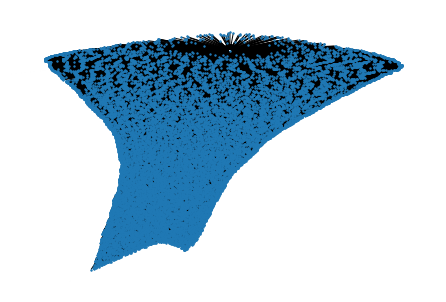

In [131]:
networkx.draw(g, node_size = 2)